<a href="https://colab.research.google.com/github/unt-geetha/Geetha_INFO5731_-Fall2021/blob/main/INFO5731_Assignment_Three_fall2023__Geetha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
# Write your code here
import pandas as pd
import re
import requests
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('all')

# Download the stopwords list from the given URL

stopwords_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"
response = requests.get(stopwords_url)
stopwords_list = set(response.text.splitlines())
df = pd.read_csv("geetha_reviews.csv")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-15T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,Bought this for a gift for some one who's old ...,Great gift,NaN,NaN,Triway
1,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-15T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,I bought this tablet for my 8 year old grandda...,A great tablet at a fabulous price,NaN,NaN,SavvyShopper
2,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-14T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,So happy with the color choices! This will be ...,Perfect for my son!,NaN,NaN,Ajgd
3,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-14T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025500/review...,Good tablet for my baby.keeps him busy. I love...,Good for kids,NaN,NaN,Flash
4,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2017-01-07T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,This Fire worked great but I returned it becau...,This unit worked great,NaN,NaN,Meman220


In [ ]:
df.rename(columns={'reviews.text': 'Text'}, inplace=True)

In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,Text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-15T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,Bought this for a gift for some one who's old ...,Great gift,NaN,NaN,Triway
1,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-15T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,I bought this tablet for my 8 year old grandda...,A great tablet at a fabulous price,NaN,NaN,SavvyShopper
2,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-14T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,So happy with the color choices! This will be ...,Perfect for my son!,NaN,NaN,Ajgd
3,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-14T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025500/review...,Good tablet for my baby.keeps him busy. I love...,Good for kids,NaN,NaN,Flash
4,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2017-01-07T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025500/review...,This Fire worked great but I returned it becau...,This unit worked great,NaN,NaN,Meman220


In [ ]:

# Define functions for data cleaning
def geetha_clean_text(text):
    # Remove noise (special characters and punctuations)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d', '', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stopwords_list)

    # Lowercase all texts
    text = text.lower()

    return text

def geetha_stem_text(text):
    # Stemming
    stemmer = PorterStemmer()
    return ' '.join(stemmer.stem(word) for word in text.split())

def geetha_lemmatize_text(text):
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

# Apply cleaning functions to the 'text' column
df['cleaned_geetha_text'] = df['Text'].apply(geetha_clean_text)
df['stemmed_geetha_text'] = df['cleaned_geetha_text'].apply(geetha_stem_text)
df['lemmatized_geetha_text'] = df['cleaned_geetha_text'].apply(geetha_lemmatize_text)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data_geetha.csv', index=False)

In [ ]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.rating,reviews.sourceURLs,Text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,cleaned_geetha_text,stemmed_geetha_text,lemmatized_geetha_text
0,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-15T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,5.0,http://reviews.bestbuy.com/3545/5025500/review...,Bought this for a gift for some one who's old ...,Great gift,NaN,NaN,Triway,bought gift one whos old tablet wont work righ...,bought gift one who old tablet wont work right...,bought gift one who old tablet wont work right...
1,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-15T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,5.0,http://reviews.bestbuy.com/3545/5025500/review...,I bought this tablet for my 8 year old grandda...,A great tablet at a fabulous price,NaN,NaN,SavvyShopper,bought tablet year old granddaughter loves dis...,bought tablet year old granddaught love displa...,bought tablet year old granddaughter love disp...
2,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-14T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,5.0,http://reviews.bestbuy.com/3545/5025500/review...,So happy with the color choices! This will be ...,Perfect for my son!,NaN,NaN,Ajgd,happy color choices perfect year old thrilled ...,happi color choic perfect year old thrill thr ...,happy color choice perfect year old thrilled t...
3,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2016-12-14T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,4.0,http://reviews.bestbuy.com/3545/5025500/review...,Good tablet for my baby.keeps him busy. I love...,Good for kids,NaN,NaN,Flash,good tablet babykeeps busy love,good tablet babykeep busi love,good tablet babykeeps busy love
4,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,B018Y225IA,Amazon,"Computers/Tablets & Networking,Tablets & eBook...","841667103143,0841667103143,brandnewamazonkindl...",Amazon,2017-01-07T00:00:00.000Z,NaN,"2017-08-27T00:00:00Z,2017-08-09T00:00:00Z,2017...",...,5.0,http://reviews.bestbuy.com/3545/5025500/review...,This Fire worked great but I returned it becau...,This unit worked great,NaN,NaN,Meman220,fire worked great returned one wantedbest buy ...,fire work great return one wantedbest buy took...,fire worked great returned one wantedbest buy ...


In [ ]:
from nltk.util import ngrams
from collections import Counter

cleaned_text = df['cleaned_geetha_text']

tokenized_texts = [text.split() for text in cleaned_text]

# as n=3 , so trigrams
trigrams = [ngrams(tokens, 3) for tokens in tokenized_texts]

flattened_trigrams = [trigram for sublist in trigrams for trigram in sublist]

trigram_freq = Counter(flattened_trigrams)

In [ ]:
trigram_freq

Counter({('bought', 'gift', 'one'): 2,
         ('gift', 'one', 'whos'): 1,
         ('one', 'whos', 'old'): 1,
         ('whos', 'old', 'tablet'): 1,
         ('old', 'tablet', 'wont'): 1,
         ('tablet', 'wont', 'work'): 1,
         ('wont', 'work', 'right'): 1,
         ('work', 'right', 'size'): 1,
         ('right', 'size', 'play'): 1,
         ('size', 'play', 'games'): 1,
         ('bought', 'tablet', 'year'): 14,
         ('tablet', 'year', 'old'): 38,
         ('year', 'old', 'granddaughter'): 31,
         ('old', 'granddaughter', 'loves'): 11,
         ('granddaughter', 'loves', 'display'): 1,
         ('loves', 'display', 'clear'): 1,
         ('display', 'clear', 'easy'): 1,
         ('clear', 'easy', 'see'): 1,
         ('easy', 'see', 'set'): 1,
         ('see', 'set', 'allows'): 1,
         ('set', 'allows', 'choose'): 1,
         ('allows', 'choose', 'child'): 1,
         ('choose', 'child', 'safe'): 1,
         ('child', 'safe', 'settings'): 1,
         ('safe', 's

In [ ]:
from nltk.util import ngrams
from collections import Counter

cleaned_text = df['cleaned_geetha_text']

tokenized_texts = [text.split() for text in cleaned_text]

# Generate bigrams for each text
bigrams_list = [list(ngrams(tokens, 2)) for tokens in tokenized_texts]

# Flatten the list of bigrams
flattened_bigrams = [bigram for sublist in bigrams_list for bigram in sublist]

# Count the frequency of bigrams
bigram_freq = Counter(flattened_bigrams)


In [ ]:
bigram_freq

Counter({('bought', 'gift'): 119,
         ('gift', 'one'): 6,
         ('one', 'whos'): 1,
         ('whos', 'old'): 1,
         ('old', 'tablet'): 6,
         ('tablet', 'wont'): 4,
         ('wont', 'work'): 3,
         ('work', 'right'): 2,
         ('right', 'size'): 24,
         ('size', 'play'): 1,
         ('play', 'games'): 127,
         ('bought', 'tablet'): 54,
         ('tablet', 'year'): 43,
         ('year', 'old'): 474,
         ('old', 'granddaughter'): 40,
         ('granddaughter', 'loves'): 45,
         ('loves', 'display'): 3,
         ('display', 'clear'): 1,
         ('clear', 'easy'): 14,
         ('easy', 'see'): 15,
         ('see', 'set'): 1,
         ('set', 'allows'): 1,
         ('allows', 'choose'): 1,
         ('choose', 'child'): 1,
         ('child', 'safe'): 1,
         ('safe', 'settings'): 1,
         ('settings', 'pin'): 1,
         ('pin', 'protected'): 1,
         ('protected', 'parent'): 1,
         ('parent', 'lock'): 1,
         ('lock', 'help'

In [ ]:
from textblob import TextBlob
from collections import Counter
import pandas as pd

# Extracting noun phrases for each review
cleaned_text = df['cleaned_geetha_text'][:1500]
noun_phrases = [TextBlob(text).noun_phrases for text in cleaned_text]

# Calculating frequency of each noun phrase across the entire dataset
all_noun_phrases = [phrase for sublist in noun_phrases for phrase in sublist]
noun_phrase_frequency = Counter(all_noun_phrases)

# Calculating relative probabilities for each review
other_probabilities = {}
for i, phrases in enumerate(noun_phrases):
    probabilities = {phrase: noun_phrase_frequency[phrase] / max(noun_phrase_frequency.values()) for phrase in phrases}
    other_probabilities[f'Review {i+1}'] = probabilities

# Creating a DataFrame for relative probabilities
df_probabilities= pd.DataFrame(other_probabilities).fillna(0)
print(df_probabilities)


                                      Review 1  Review 2  Review 3  Review 4  \
old tablet wont work                  0.019608  0.000000       0.0       0.0   
size play games                       0.019608  0.000000       0.0       0.0   
tablet year                           0.000000  0.215686       0.0       0.0   
old granddaughter                     0.000000  0.235294       0.0       0.0   
safe settings pin                     0.000000  0.019608       0.0       0.0   
...                                        ...       ...       ...       ...   
sure shell                            0.000000  0.000000       0.0       0.0   
grand baby christmashavent            0.000000  0.000000       0.0       0.0   
reviews greati                        0.000000  0.000000       0.0       0.0   
sure hell                             0.000000  0.000000       0.0       0.0   
easy play helpful learning childrens  0.000000  0.000000       0.0       0.0   

                                      R

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer

abstracts_documents = df['cleaned_geetha_text']

vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the text data to TF-IDF matrix
matrix_tfidf = vectorizer_tfidf.fit_transform(abstracts_documents)

In [ ]:
matrix_tfidf

<19628x13292 sparse matrix of type '<class 'numpy.float64'>'
	with 289900 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

query = "Geetha strives hard for her studies and also makes sure to take care of family"

query_vector = vectorizer_tfidf.transform([query])

cosine_similarities = cosine_similarity(query_vector, matrix_tfidf)

sorted_indices = cosine_similarities.argsort()[0][::-1]

for idx in sorted_indices:
    print(f"Document {idx+1}: Similarity = {cosine_similarities[0][idx]}")
    print(df['cleaned_geetha_text'][idx])
    print("-" * 50)

Streaming output truncated to the last 5000 lines.
easy use fast menu set user friendly way
--------------------------------------------------
Document 18876: Similarity = 0.0
save enough reduced cable bills two months pay amazon fire tv
--------------------------------------------------
Document 18877: Similarity = 0.0
love fire tv brought sock earlier stable quick definitely would buy
--------------------------------------------------
Document 18879: Similarity = 0.0
amazon fire tv perfect streaming box getting rid cable plenty apps good quality video easy use
--------------------------------------------------
Document 18851: Similarity = 0.0
purchased two weeks ago watched every night extremely fast k content nice voice remote
--------------------------------------------------
Document 18880: Similarity = 0.0
fire tv changed life unit awesome absolutely love
--------------------------------------------------
Document 18881: Similarity = 0.0
fast offers k video allows download rd par

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
from gensim.models import Word2Vec

tokenized_sentences = [text.split() for text in cleaned_text]

word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=5, min_count=1, workers=4)

word2vec_model.save("word2vec_model")

word_vector = word2vec_model.wv['word']

similar_words = word2vec_model.wv.most_similar('word')

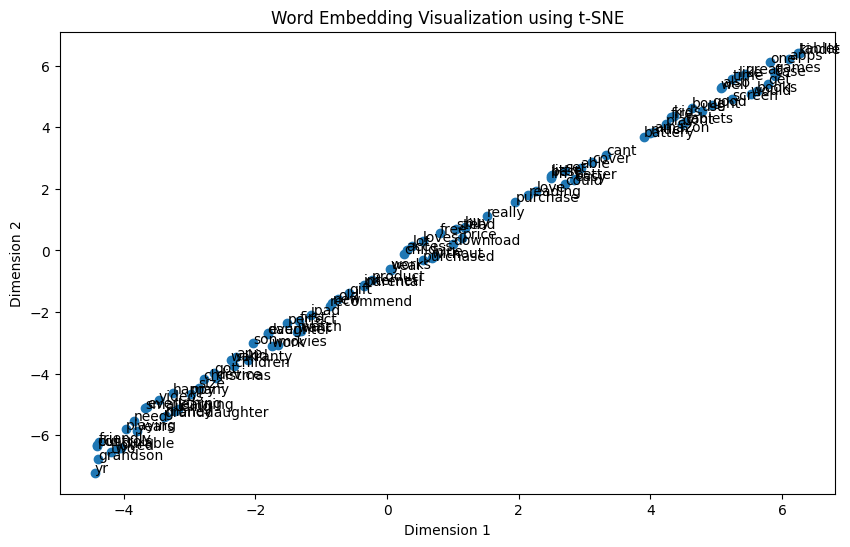

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

word_vectors = word2vec_model.wv

common_words = list(word_vectors.key_to_index.keys())[:100]

# Extract their vectors
word_vectors_subset = word_vectors[common_words]

# Reduce dimensions to 2D
tsne = TSNE(n_components=2)
word_vectors_2d = tsne.fit_transform(word_vectors_subset)

# Plot the 2D word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

# Annotate words
for i, word in enumerate(common_words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embedding Visualization using t-SNE')
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:
https://github.com/unt-geetha/Dataset



